In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.7)


In [8]:
import pandas as pd

data = pd.DataFrame(X)
data.insert(784, 'label', y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


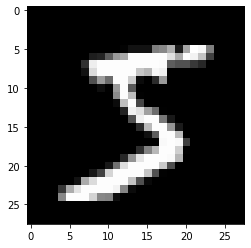

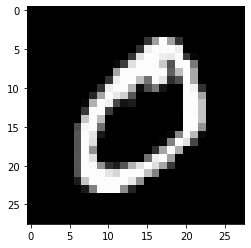

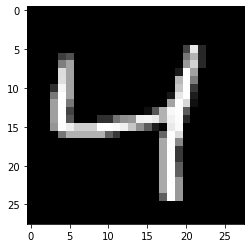

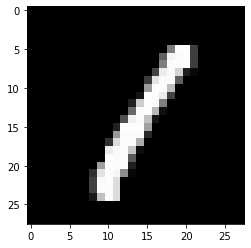

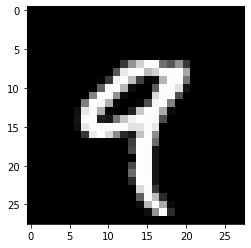

In [9]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation='logistic')
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation='logistic')
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation='logistic')


In [11]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [17]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['4', '4', '1', ..., '1', '1', '1'], dtype='<U1')

In [14]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

In [15]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

Actual Value: 4
Predicted Value for 1 Hidden Layer: 4
Predicted Value for 100 Hidden Layer: 4
Predicted Value for 1000 Hidden Layer: 4


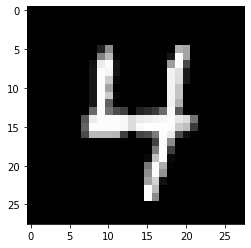

In [19]:
print(f'Actual Value: {y_test[1]}')
print(f'Predicted Value for 1 Hidden Layer: {predictions_NN[1]}')
print(f'Predicted Value for 100 Hidden Layer: {predictions_NN1[1]}')
print(f'Predicted Value for 1000 Hidden Layer: {predictions_NN2[1]}')

plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)


array([[   0,   35,    5,    0, 2499,  150,  879, 1299,   44,    0],
       [   0, 5360,   54,    0,    3,   25,   18,    5,   79,    0],
       [   0, 3912,  107,    0,  112,  213,  182,   65,  305,    0],
       [   0, 4248,  120,    0,   20,  151,  132,   43,  272,    0],
       [   0,   24,    3,    0, 3342,   53,  250, 1079,   17,    0],
       [   0, 2071,  234,    0,   85,  548,  514,  139,  793,    0],
       [   0,  110,   23,    0, 1754,  316, 1181, 1220,  176,    0],
       [   0,  101,   35,    0, 3255,  139,  518,  934,   90,    0],
       [   0, 2812,  278,    0,   96,  419,  311,   90,  751,    0],
       [   0,   35,    9,    0, 2823,   71,  450, 1465,   49,    0]])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_NN))
print(classification_report(y_test, predictions_NN1))
print(classification_report(y_test, predictions_NN2))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4911
           1       0.29      0.97      0.44      5544
           2       0.12      0.02      0.04      4896
           3       0.00      0.00      0.00      4986
           4       0.24      0.70      0.36      4768
           5       0.26      0.12      0.17      4384
           6       0.27      0.25      0.26      4780
           7       0.15      0.18      0.16      5072
           8       0.29      0.16      0.20      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.25     49000
   macro avg       0.16      0.24      0.16     49000
weighted avg       0.16      0.25      0.17     49000

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.96      0.96      4896
           3       0.96 